<a href="https://colab.research.google.com/github/ghostcat17/portfolio/blob/main/Copy_of_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Pitt/NoFloats


/content/drive/.shortcut-targets-by-id/1ElGklO6kbzbIVk4xFn_2mkaBxm8I89as/Pitt/NoFloats


In [ ]:
ls

fulle10ppd.pkl  fulle14ppd.pkl  fulle18ppd.pkl  fulle9ppd.pkl   fullmaleppd.pkl
fulle11ppd.pkl  fulle15ppd.pkl  fulle19ppd.pkl  fullfemppd.pkl  fullmid.pkl
fulle12ppd.pkl  fulle16ppd.pkl  fulle20ppd.pkl  fullhigh.pkl
fulle13ppd.pkl  fulle17ppd.pkl  fulle8ppd.pkl   fulllow.pkl


In [ ]:
import gensim
import keras
import pickle

In [ ]:
filename1='fullmid.pkl'
data=pickle.load(open(filename1,'rb')) ###open preprocessed data
data


,Transcript,AD,id,sex,educ
186,oh boy exc,1.0,1.000000e+01,1.0,12.0
187,wowie boy going cookie jar stool r get,1.0,1.000000e+01,1.0,12.0
188,wowie boy going cookie jar stool r get,1.0,1.000000e+01,1.0,12.0
189,hit bottom,1.0,1.000000e+01,1.0,12.0
190,mama ov sink overrunning uh,1.0,1.000000e+01,1.0,12.0
...,...,...,...,...,...
25889,washing dish and sink overflowing,0.0,2.000018e+09,0.0,15.0
25890,and paying attention going,0.0,2.000018e+09,0.0,15.0
25891,it nice kitchen clean,0.0,2.000018e+09,0.0,15.0
25892,nice outside nice yard,0.0,2.000018e+09,0.0,15.0


In [ ]:
Y= data.iloc[:,1].values
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X = data['Transcript'].tolist()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0) ##split the data in training and testing


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
def create_tokens(lines):
    tokens = Tokenizer()        ###function to create tokens
    tokens.fit_on_texts(lines)
    return tokens

In [ ]:
train_tokenizer = create_tokens(X_train)

In [ ]:
def encode_sentences(tokens,length,lines):   ###function to pad the data to maximum phrase length
    X=tokens.texts_to_sequences(lines)
    X=pad_sequences(X,length,padding='post')
    return X    

In [ ]:
X_train = encode_sentences(train_tokenizer,100, X_train)
X_test = encode_sentences(train_tokenizer,100, X_test)

In [ ]:
print(X_train.shape)   ###check for dimensions
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13551, 100)
(3388, 100)
(13551,)
(3388,)


In [ ]:
vocab_len= len(train_tokenizer.word_index ) + 1 
vocab_len   ###vocab length

2221

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D, LSTM, Bidirectional
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model = Sequential()
e = Embedding(vocab_len, 100, input_length= 100)
model.add(e)
model.add(Conv1D(filters=128,kernel_size=3,activation='relu',strides= 1, kernel_initializer='he_uniform'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform'))
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn_lstm_history=model.fit(X_train, Y_train, epochs = 25, batch_size = 64, verbose = 1, validation_split = 0.1)

Epoch 1/25
191/191 [==============================] - 16s 67ms/step - loss: nan - accuracy: 0.7706 - val_loss: nan - val_accuracy: 0.7596
Epoch 2/25
191/191 [==============================] - 12s 63ms/step - loss: nan - accuracy: 0.7714 - val_loss: nan - val_accuracy: 0.7596
Epoch 3/25
191/191 [==============================] - 12s 62ms/step - loss: nan - accuracy: 0.7714 - val_loss: nan - val_accuracy: 0.7596
Epoch 4/25
191/191 [==============================] - 12s 62ms/step - loss: nan - accuracy: 0.7714 - val_loss: nan - val_accuracy: 0.7596
Epoch 5/25
191/191 [==============================] - 12s 62ms/step - loss: nan - accuracy: 0.7714 - val_loss: nan - val_accuracy: 0.7596
Epoch 6/25
191/191 [==============================] - 12s 62ms/step - loss: nan - accuracy: 0.7714 - val_loss: nan - val_accuracy: 0.7596
Epoch 7/25
191/191 [==============================] - 12s 62ms/step - loss: nan - accuracy: 0.7714 - val_loss: nan - val_accuracy: 0.7596
Epoch 8/25
191/191 [==============

In [ ]:
keras.utils.plot_model(cnn_lstm_history, show_shapes=True, rankdir="LR")

AttributeError: ignored

In [ ]:
filename2='fulllow.pkl'
data=pickle.load(open(filename2,'rb')) ###open preprocessed data

In [ ]:
Y= data.iloc[:,1].values
Y
X = data['Transcript'].tolist()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0) ##split the data in training and testing

In [ ]:
train_tokenizer = create_tokens(X_train)
X_train = encode_sentences(train_tokenizer,100, X_train)
X_test = encode_sentences(train_tokenizer,100, X_test)
vocab_len= len(train_tokenizer.word_index ) + 1 
vocab_len   ###vocab length

576

In [ ]:
model = Sequential()
e = Embedding(vocab_len, 100, input_length= 100)
model.add(e)
model.add(Conv1D(filters=128,kernel_size=3,activation='relu',strides= 1, kernel_initializer='he_uniform'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform'))
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn_lstm_history2=model.fit(X_train, Y_train, epochs = 25, batch_size = 64, verbose = 1, validation_split = 0.1)

Epoch 1/25
15/15 [==============================] - 5s 111ms/step - loss: nan - accuracy: 0.1862 - val_loss: nan - val_accuracy: 0.2115
Epoch 2/25
15/15 [==============================] - 1s 62ms/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.2115
Epoch 3/25
15/15 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.2115
Epoch 4/25
15/15 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.2115
Epoch 5/25
15/15 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.2115
Epoch 6/25
15/15 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.2115
Epoch 7/25
15/15 [==============================] - 1s 63ms/step - loss: nan - accuracy: 0.1625 - val_loss: nan - val_accuracy: 0.2115
Epoch 8/25
15/15 [==============================] - 1s

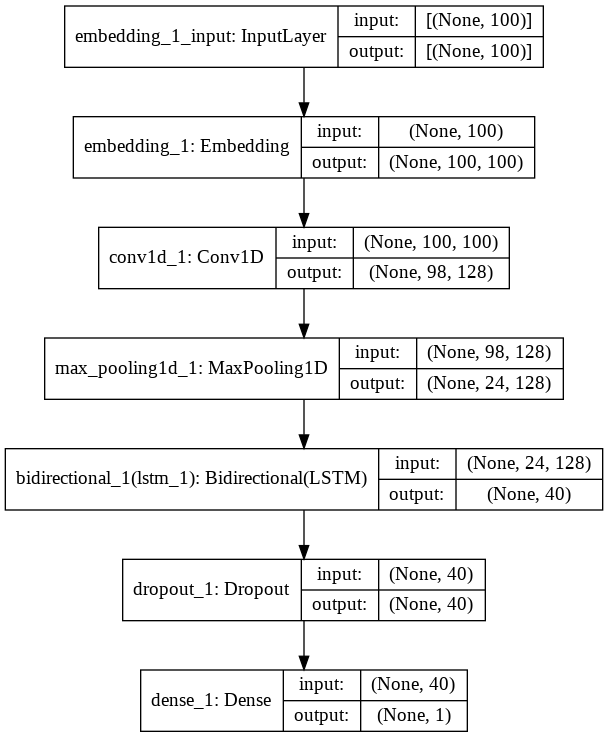

In [ ]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
filename3='fullhigh.pkl'
data=pickle.load(open(filename3,'rb')) ###open preprocessed data

NameError: ignored

In [ ]:
Y= data.iloc[:,1].values
X = data['Transcript'].tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0) ##split the data in training and testing
print(X_train) ###length of training, testing data
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

In [ ]:
train_tokenizer = create_tokens(X_train)
X_train = encode_sentences(train_tokenizer,100, X_train)
X_test = encode_sentences(train_tokenizer,100, X_test)
vocab_len= len(train_tokenizer.word_index ) + 1 
vocab_len   ###vocab length

In [ ]:
model = Sequential()
e = Embedding(vocab_len, 100, input_length= 100)
model.add(e)
model.add(Conv1D(filters=128,kernel_size=3,activation='relu',strides= 1, kernel_initializer='he_uniform'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer= 'glorot_uniform'))
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
cnn_lstm_history3=model.fit(X_train, Y_train, epochs = 25, batch_size = 64, verbose = 1, validation_split = 0.1)

In [ ]:
filename1='fullmid.pkl'
data=pickle.load(open(filename1,'rb')) ###open preprocessed data
filename2='fulllow.pkl'
data+=pickle.load(open(filename1,'rb')) ###open preprocessed data
filename3='fullhgih.pkl'
data+=pickle.load(open(filename1,'rb')) ###open preprocessed data

data

In [ ]:
Y= data.iloc[:,1].values
X = data['Transcript'].tolist()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0) ##split the data in training and testing
print(X_train) ###length of training, testing data
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

In [ ]:
train_tokenizer = create_tokens(X_train)
X_train = encode_sentences(train_tokenizer,100, X_train)
X_test = encode_sentences(train_tokenizer,100, X_test)
vocab_len= len(train_tokenizer.word_index ) + 1 
vocab_len   ###vocab length
X_tr = []
for i in range(len(X_train)):
  X_tr.add([model.predict(X_train[i])])


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

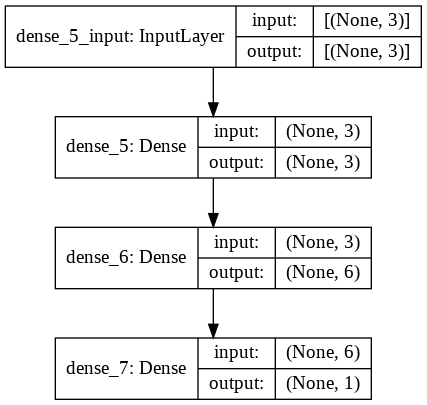

In [ ]:
model = Sequential()
model.add(Dense(3,input_dim=3,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1,activation='sigmoid',kernel_initializer= 'glorot_uniform'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
cnn_lstm_historyfinal=model.fit(X_train, Y_train, epochs = 25, batch_size = 64, verbose = 1, validation_split = 0.1)